In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
df = pd.read_csv("HR_Analytics.csv")

print("Data Loaded")
print("Shape:", df.shape)
df.head()

Data Loaded
Shape: (1480, 38)


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


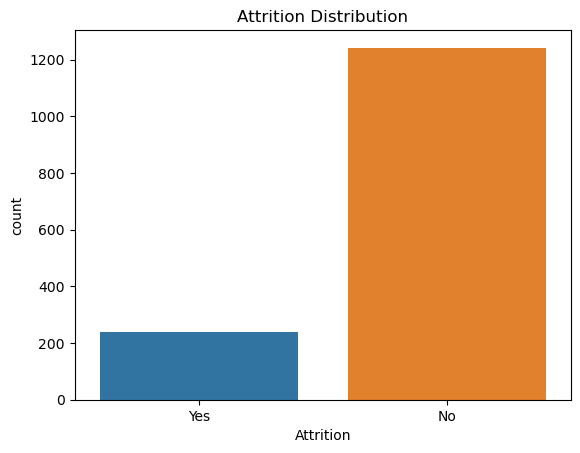

No     83.918919
Yes    16.081081
Name: Attrition, dtype: float64

In [27]:
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

df['Attrition'].value_counts(normalize=True) * 100

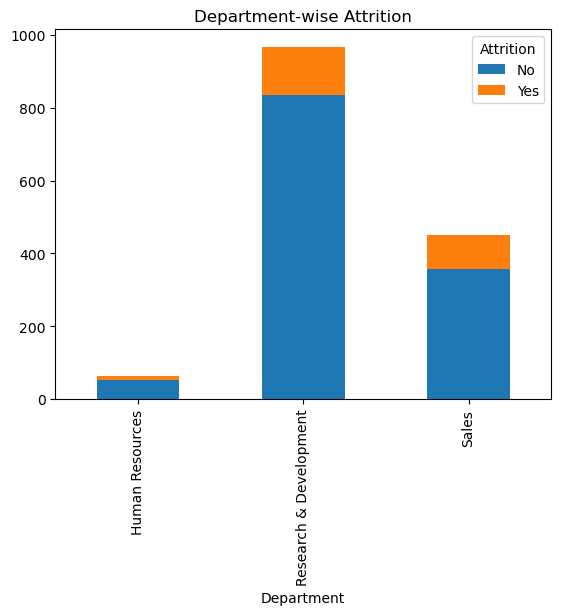

In [28]:
dept_attrition = pd.crosstab(df['Department'], df['Attrition'])
dept_attrition.plot(kind='bar', stacked=True)
plt.title("Department-wise Attrition")
plt.show()

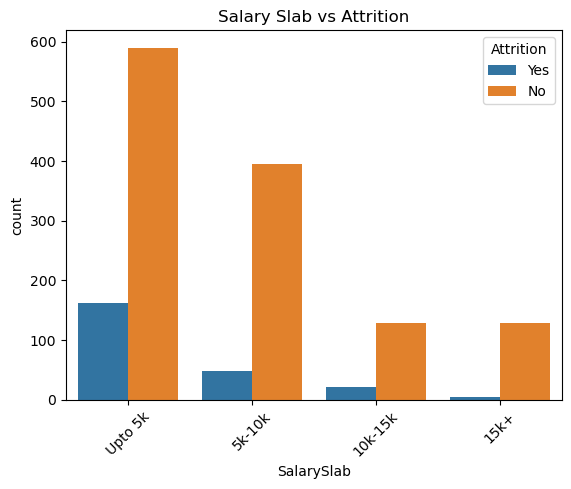

In [29]:
sns.countplot(x='SalarySlab', hue='Attrition', data=df)
plt.title("Salary Slab vs Attrition")
plt.xticks(rotation=45)
plt.show()

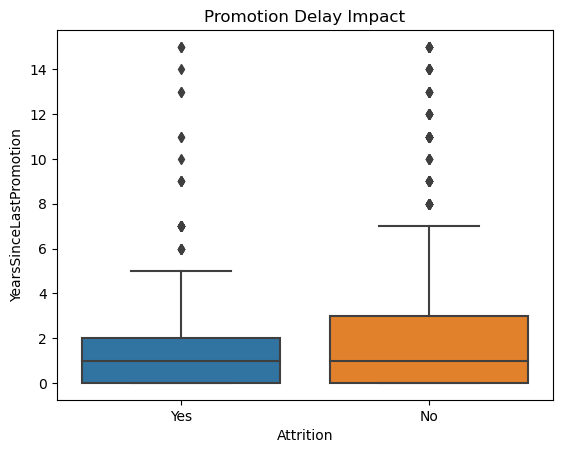

In [30]:
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.title("Promotion Delay Impact")
plt.show()

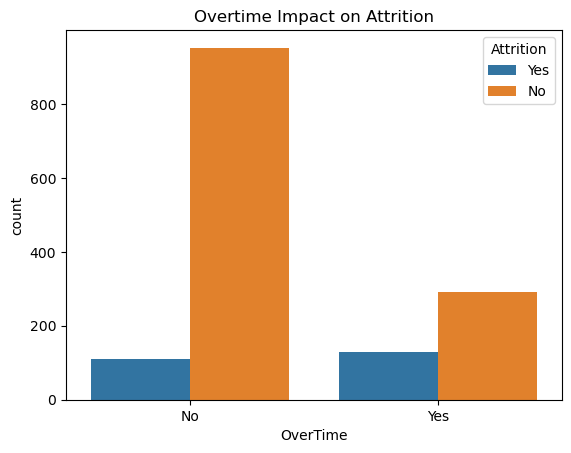

In [31]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Overtime Impact on Attrition")
plt.show()

In [32]:
df_model = df.drop(['EmpID','EmployeeNumber','EmployeeCount','Over18','StandardHours'], axis=1)

In [33]:
df_model['Attrition'] = df_model['Attrition'].map({'Yes':1,'No':0})

In [34]:
categorical_cols = df_model.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col])

In [35]:
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [36]:
print(df_model.isnull().sum())

Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWit

In [37]:
print("Total missing values:", df_model.isnull().sum().sum())

Total missing values: 57


In [38]:
# Separate numerical and categorical columns
num_cols = df_model.select_dtypes(include=['int64','float64']).columns
cat_cols = df_model.select_dtypes(include=['object']).columns

# Fill numerical with median
for col in num_cols:
    df_model[col] = df_model[col].fillna(df_model[col].median())

# Fill categorical with mode
for col in cat_cols:
    df_model[col] = df_model[col].fillna(df_model[col].mode()[0])

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])

In [40]:
print(df_model.isnull().sum().sum())

0


In [41]:
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8581081081081081
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       249
           1       0.61      0.30      0.40        47

    accuracy                           0.86       296
   macro avg       0.74      0.63      0.66       296
weighted avg       0.84      0.86      0.84       296



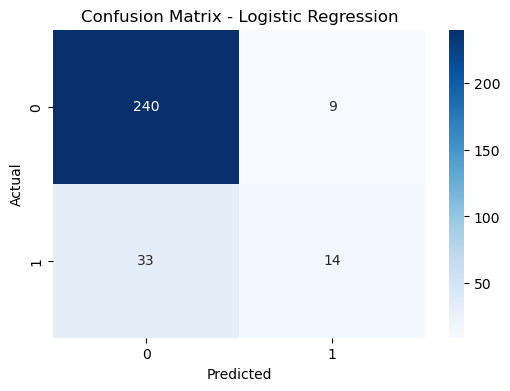

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [60]:
print(np.unique(y_test))

[0 1]


In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y   # ⭐ THIS FIXES THE ISSUE
)

In [63]:
import numpy as np

print("NaNs in X_train:", np.isnan(X_train).sum())

NaNs in X_train: 46


In [64]:
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

In [66]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [69]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8783783783783784
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       248
           1       0.73      0.40      0.51        48

    accuracy                           0.88       296
   macro avg       0.81      0.68      0.72       296
weighted avg       0.87      0.88      0.86       296



In [71]:
print("NaNs after imputation:", np.isnan(X_imputed).sum())

NaNs after imputation: 0


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Total NaNs in dataset: 57
YearsWithCurrManager        57
RelationshipSatisfaction     0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
StandardHours                0
Age                          0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
MonthlyIncome                0
EmpID                        0
JobSatisfaction              0
JobRole                      0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumbe

In [74]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8783783783783784
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       248
           1       0.73      0.40      0.51        48

    accuracy                           0.88       296
   macro avg       0.81      0.68      0.72       296
weighted avg       0.87      0.88      0.86       296



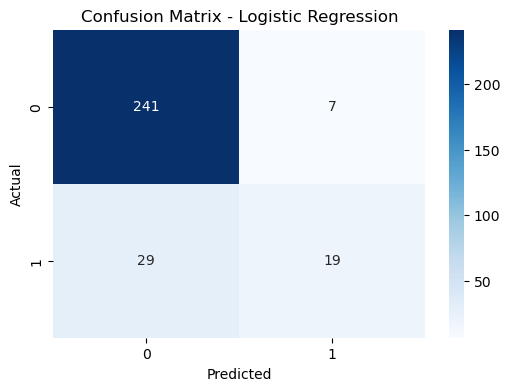

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [77]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = log_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8518985215053764


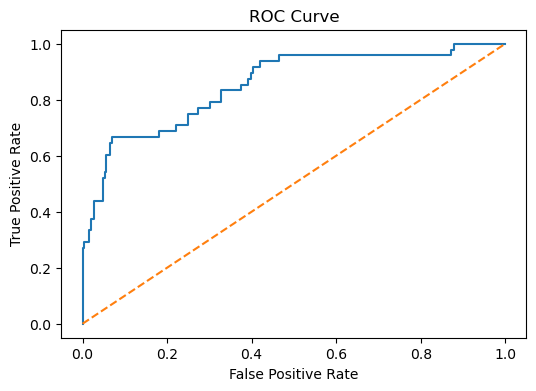

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [79]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance.head(10))

                    Feature  Coefficient
20                 OverTime     0.790834
30  YearsSinceLastPromotion     0.577566
28           YearsAtCompany     0.393281
4                Department     0.363837
19       NumCompaniesWorked     0.309003
15            MaritalStatus     0.307390
5          DistanceFromHome     0.281525
1                  AgeGroup     0.266751
9                    Gender     0.246986
2            BusinessTravel     0.136510


In [81]:
!pip install shap

In [82]:
import shap

In [83]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [84]:
explainer = shap.TreeExplainer(tree_model)

In [85]:
shap_values = explainer.shap_values(X_test)

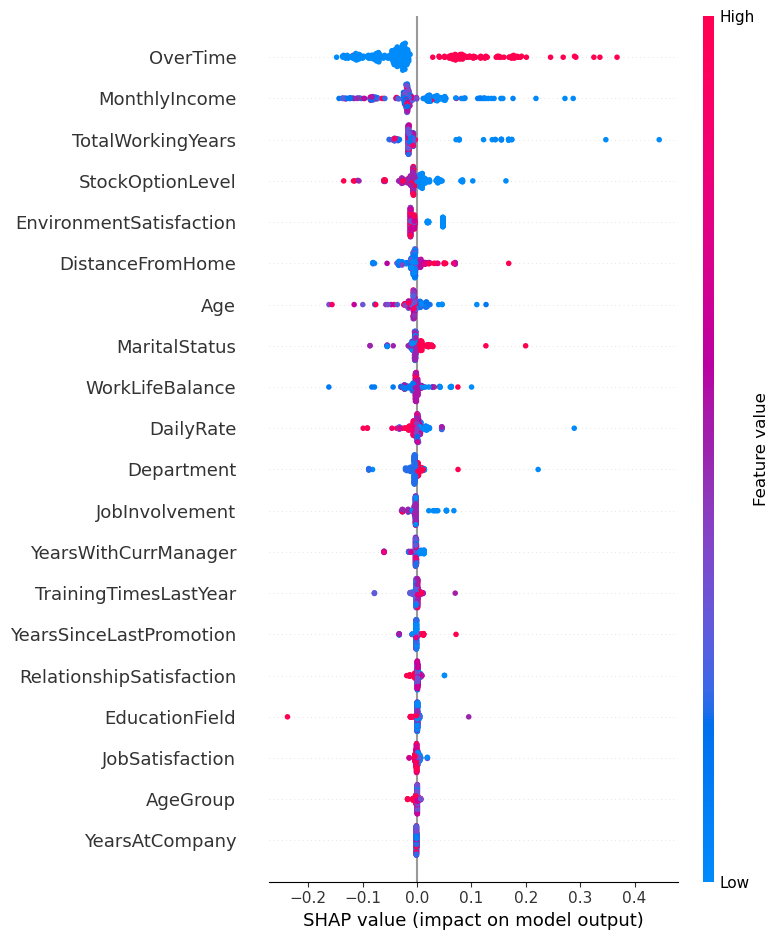

In [88]:
import pandas as pd
import shap

# Convert X_test to DataFrame
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Use class 1 (Attrition)
shap.summary_plot(
    shap_values[:, :, 1],
    X_test_df
)

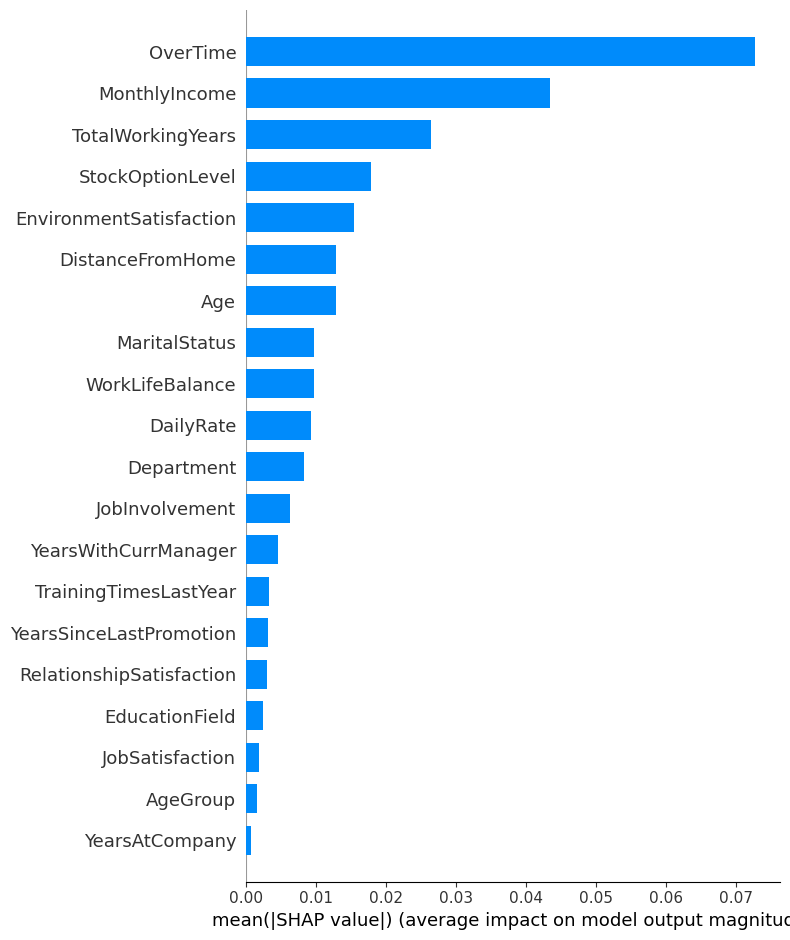

In [89]:
shap.summary_plot(
    shap_values[:, :, 1],
    X_test_df,
    plot_type="bar"
)